In [2]:
import pandas as pd, numpy as np 

In [3]:
data = pd.read_csv('data/chicago_taxi_trips_2016_11.csv') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295000 entries, 0 to 1294999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1294453 non-null  float64
 1   trip_start_timestamp    1295000 non-null  object 
 2   trip_end_timestamp      1294850 non-null  object 
 3   trip_seconds            1294564 non-null  float64
 4   trip_miles              1294987 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    826575 non-null   float64
 7   pickup_community_area   1176867 non-null  float64
 8   dropoff_community_area  1149193 non-null  float64
 9   fare                    1294983 non-null  float64
 10  tips                    1294983 non-null  float64
 11  tolls                   1294983 non-null  float64
 12  extras                  1294983 non-null  float64
 13  trip_total              1294983 non-null  float64
 14  pa

In [4]:
data['tolls'].unique()

array([0.000e+00, 1.900e+00, 2.000e+00, 3.000e+00, 1.500e+00, 4.000e+00,
       5.000e+00, 4.500e+00, 3.800e+00, 2.500e+00, 5.500e+00, 1.000e+00,
       2.100e+01, 5.000e+01, 4.400e+00, 1.000e-02, 1.400e+00, 3.500e+00,
             nan, 2.400e+00, 5.250e+00, 2.600e+00, 9.500e-01, 2.300e+01,
       1.890e+01, 1.800e+00, 4.900e+00, 2.500e+01, 4.800e+00, 2.100e+00,
       8.000e+00, 1.700e+01, 7.500e+00, 4.000e-02, 7.500e-01, 4.600e+01,
       4.300e+00, 6.000e+00, 3.400e+00, 3.300e+00, 3.140e+00, 7.500e+01,
       3.600e+00, 6.000e-01, 1.850e+00, 7.000e+00, 1.600e+00, 4.010e+00,
       3.811e+01, 1.000e+01, 1.675e+01, 2.800e+00, 5.000e-02, 1.990e+00,
       4.700e+00, 1.908e+01, 3.900e+00, 1.980e+00, 8.000e-01, 9.000e-01,
       8.000e+01, 4.525e+01, 3.250e+00, 1.200e-01, 4.100e+00, 4.500e-01,
       5.000e-01, 1.800e+01, 2.700e+00, 6.800e+00])

In [5]:
clean_data = data[['pickup_community_area', 'dropoff_community_area', 'trip_seconds']].dropna()
clean_data = clean_data[clean_data.trip_seconds>300.0]

In [6]:
clean_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
0,33.0,28.0,840.0
1,32.0,28.0,540.0
2,8.0,3.0,1200.0
3,32.0,8.0,480.0
5,24.0,4.0,1440.0


In [7]:
sorted_data = clean_data.sort_values(by=['pickup_community_area', 'dropoff_community_area'], ascending=True)

In [8]:
sorted_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
31,1.0,1.0,360.0
347,1.0,1.0,660.0
744,1.0,1.0,420.0
3510,1.0,1.0,401.0
22054,1.0,1.0,780.0


In [128]:
final_data = sorted_data.groupby(['pickup_community_area', 'dropoff_community_area'], as_index=False)['trip_seconds'].mean()
# df.groupby('A').mean()
final_data['trip_seconds'] = final_data['trip_seconds'].round(0)

In [134]:
final_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
0,1.0,1.0,920.0
1,1.0,2.0,621.0
2,1.0,3.0,749.0
3,1.0,4.0,766.0
4,1.0,5.0,1010.0


In [135]:
# unique values
unique_nodes = final_data['pickup_community_area'].unique().shape[0]

In [136]:
final_data_np = final_data.to_numpy()

In [44]:
# final_data_np[[0]]

    

array([[1.00000000e+00, 1.00000000e+00, 9.20431373e+02],
       [1.00000000e+00, 2.00000000e+00, 6.20733564e+02],
       [1.00000000e+00, 3.00000000e+00, 7.49194946e+02],
       ...,
       [7.70000000e+01, 7.30000000e+01, 2.58000000e+03],
       [7.70000000e+01, 7.60000000e+01, 2.45211799e+03],
       [7.70000000e+01, 7.70000000e+01, 1.08051111e+03]])

In [57]:
final_data_np[77]

array([2.00000000e+00, 7.60000000e+01, 2.48271681e+03])

In [137]:
adjacency_matrix = np.zeros((unique_nodes, unique_nodes))

In [138]:
# fill adjacency matrix 
counter = 0 
for i, j in final_data_np[:, 0:2]:
    row = int(i) - 1 
    col = int(j) - 1 
    adjacency_matrix[row, col] = final_data_np[[counter]][0][2]
    counter += 1 
        

In [139]:
adjacency_matrix

array([[ 920.,  621.,  749., ...,    0., 2566.,  634.],
       [ 641., 1467.,  914., ...,    0., 2483.,  750.],
       [ 843., 1043., 1011., ...,    0., 2654.,  618.],
       ...,
       [   0.,    0.,    0., ...,  600.,    0.,    0.],
       [2445., 2059., 2377., ..., 3390., 1644., 2419.],
       [ 656.,  803.,  628., ...,    0., 2452., 1081.]])

In [140]:
degree_matrix = np.diag(adjacency_matrix.sum(axis=1))

In [141]:
degree_matrix

array([[ 70017.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,  83501.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,  95004., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ...,  16000.,      0.,      0.],
       [     0.,      0.,      0., ...,      0., 185798.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,  87336.]])

In [142]:
laplacian_matrix = degree_matrix - adjacency_matrix

In [143]:
laplacian_matrix

array([[ 69097.,   -621.,   -749., ...,      0.,  -2566.,   -634.],
       [  -641.,  82034.,   -914., ...,      0.,  -2483.,   -750.],
       [  -843.,  -1043.,  93993., ...,      0.,  -2654.,   -618.],
       ...,
       [     0.,      0.,      0., ...,  15400.,      0.,      0.],
       [ -2445.,  -2059.,  -2377., ...,  -3390., 184154.,  -2419.],
       [  -656.,   -803.,   -628., ...,      0.,  -2452.,  86255.]])

In [144]:
# eigen values and vectors 

eig_val, eig_vec = np.linalg.eig(laplacian_matrix)

In [163]:
eig_vec[:,1:3]

array([[ 1.90965642e-02+0.j, -2.88273458e-02+0.j],
       [ 3.95903189e-02+0.j, -4.38056193e-02+0.j],
       [ 2.72810053e-02+0.j, -7.63959833e-03+0.j],
       [ 2.71386645e-02+0.j, -2.29171241e-02+0.j],
       [ 1.79911154e-02+0.j, -1.80675891e-02+0.j],
       [ 3.06514132e-02+0.j,  2.03154908e-02+0.j],
       [ 2.50168468e-02+0.j,  4.44370104e-02+0.j],
       [ 3.68381919e-02+0.j,  8.40419930e-01+0.j],
       [-1.46782648e-03+0.j, -1.46560051e-02+0.j],
       [ 1.00372771e-01+0.j, -4.62640512e-02+0.j],
       [ 7.34514375e-03+0.j, -2.70396088e-02+0.j],
       [ 2.03718899e-02+0.j, -2.44202555e-02+0.j],
       [ 1.60446401e-02+0.j, -3.23572302e-02+0.j],
       [ 1.68410616e-02+0.j, -1.66720691e-02+0.j],
       [ 1.65923386e-02+0.j, -1.93100069e-02+0.j],
       [ 1.37230029e-02+0.j, -1.87865938e-02+0.j],
       [-4.00325898e-03+0.j, -2.68734699e-02+0.j],
       [-1.09877253e-03+0.j,  2.78894444e-03+0.j],
       [ 1.23120882e-02+0.j, -2.71714196e-02+0.j],
       [ 1.27841364e-02+0.j, -2

In [146]:
adjacency_df = pd.DataFrame(adjacency_matrix)
adjacency_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,920.0,621.0,749.0,766.0,1010.0,848.0,1242.0,1515.0,900.0,1650.0,...,0.0,0.0,3060.0,0.0,0.0,0.0,0.0,0.0,2566.0,634.0
1,641.0,1467.0,914.0,656.0,962.0,1099.0,1191.0,1550.0,1080.0,1560.0,...,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.0,750.0
2,843.0,1043.0,1011.0,632.0,730.0,587.0,847.0,881.0,2085.0,1916.0,...,0.0,2640.0,0.0,1560.0,0.0,0.0,0.0,0.0,2654.0,618.0
3,864.0,683.0,690.0,852.0,527.0,786.0,1120.0,1283.0,1404.0,1545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,624.0
4,1029.0,1132.0,673.0,586.0,836.0,604.0,834.0,1254.0,1140.0,1520.0,...,2880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,1380.0,0.0,1680.0,0.0,0.0,...,780.0,0.0,0.0,720.0,0.0,7740.0,0.0,420.0,2970.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1320.0,840.0,0.0,1320.0,0.0,600.0,0.0,0.0
75,2445.0,2059.0,2377.0,2018.0,2022.0,2423.0,2381.0,2509.0,1089.0,929.0,...,6120.0,3372.0,3135.0,3451.0,3254.0,3045.0,2592.0,3390.0,1644.0,2419.0


In [147]:
import networkx as nx
def draw(G):
    from pylab import rcParams
    rcParams['figure.figsize'] = 14, 10

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_size=500, node_color ='green')
    labels = nx.get_edge_attributes(G, 'weight') 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 

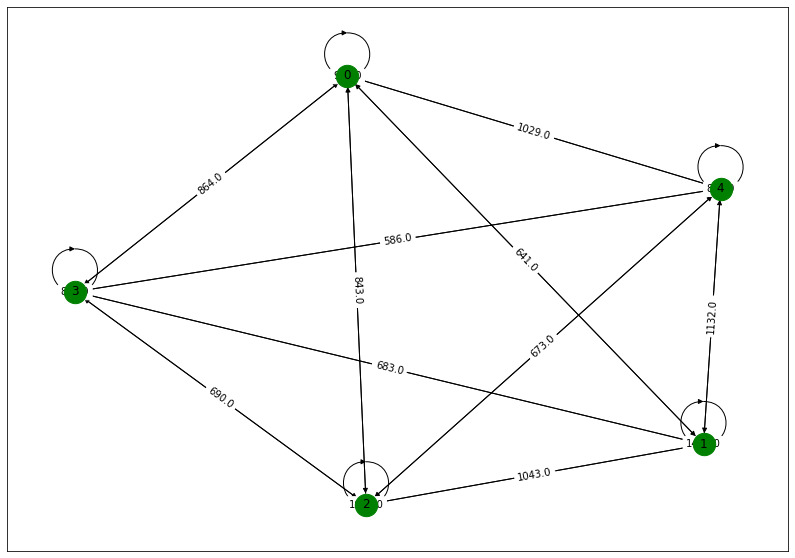

In [148]:
## Directed Graph 
G_di = nx.from_pandas_adjacency(adjacency_df.head(5), create_using=nx.DiGraph) 

draw(G_di)

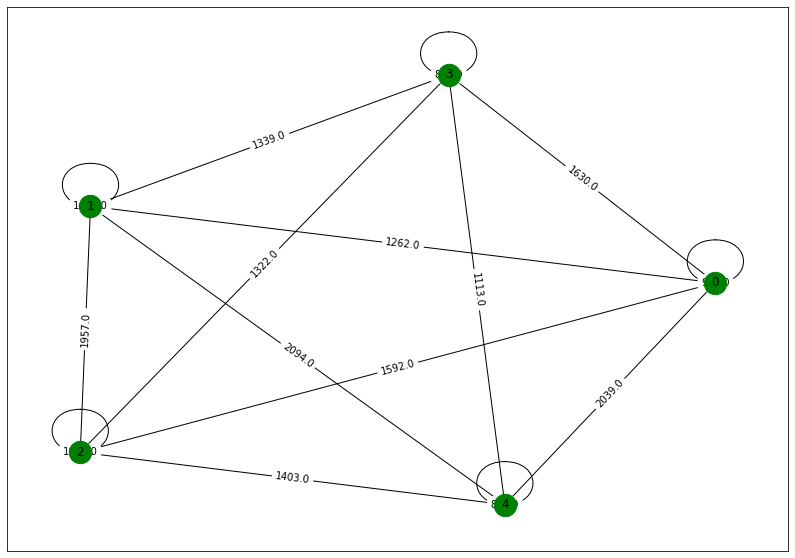

In [149]:
G_un = nx.Graph()
G_un.add_edges_from(G_di.edges(), weight=0) 
for u, v, d in G_di.edges(data=True):
    G_un[u][v]['weight'] += d['weight']

draw(G_un)

In [150]:
A_di = nx.to_numpy_array(G_di) 
A_un = nx.to_numpy_array(G_un) 

In [157]:
"""
Spectral Clustering 

A: Adjacency matrix 
n: n_clusters 

"""
def spectral_clustering(A, n=3): 
    D = np.diag(A.sum(axis=1)) 
    L = D-A 
    
    vals, vecs = np.linalg.eig(L) 
    vals = vals.real
    vecs = vecs.real
    vecs = vecs[:,np.argsort(vals)] 
    vals = vals[np.argsort(vals)] 
    
    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=n)
    kmeans.fit(vecs[:,1:n+1])
    clusters = kmeans.labels_
    print("Clusters:", clusters) 
    
    best_cut = vecs[:,1] > 0 
    
    return clusters, best_cut 

In [160]:
clusters, best_cut = spectral_clustering(adjacency_matrix, n=10)

Clusters: [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 9 0 0 0 0 3 1 2 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0
 5 0 0]


(array([68.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

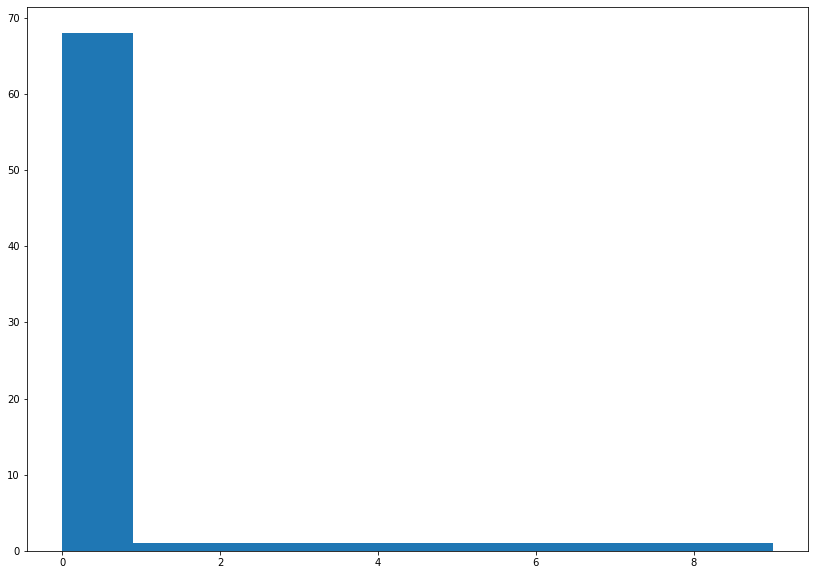

In [161]:
import matplotlib.pyplot as plt 
plt.hist(clusters)